# Samuel Gartenstein QMSS GR5073 Fall 2023 Midterm

## NOTE: Please give the SVM models using GridSearchCV about 30 to 60 seconds to run!

# Question 1

Import the spam dataset and print the first six rows.  

In [40]:
#Importing all necessary Python libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


spam_df = pd.read_csv("/content/spam_dataset.csv")
spam_df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# Question 2

Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?




In [41]:
print(spam_df.dtypes)

word_freq_make:                float64
word_freq_address:             float64
word_freq_all:                 float64
word_freq_3d:                  float64
word_freq_our:                 float64
word_freq_over:                float64
word_freq_remove:              float64
word_freq_internet:            float64
word_freq_order:               float64
word_freq_mail:                float64
word_freq_receive:             float64
word_freq_will:                float64
word_freq_people:              float64
word_freq_report:              float64
word_freq_addresses:           float64
word_freq_free:                float64
word_freq_business:            float64
word_freq_email:               float64
word_freq_you:                 float64
word_freq_credit:              float64
word_freq_your:                float64
word_freq_font:                float64
word_freq_000:                 float64
word_freq_money:               float64
word_freq_hp:                  float64
word_freq_hpl:           

The code above shows all the columns and their data type. The predictors that I think are important will the frequency of the word your (word_freq_your:) the frequency of the word money (word_freq_money:), and the frequency of the word credit (word_freq_credit:). I choose the first two words because a lot of scams say that they need money, or that they have placed money in "your" account and you to verify "your" information, which they will steal. For credit, a lot of people get emails asking them to apply for a new credit card. Whether or not those emails fake, I believe that most people will spam those emails. I list out the three variables below:


1. word_freq_your:

2. word_freq_money:

3. word_freq_credit:




# Question 3

Visualize the univariate distribution of each of the variables in the previous question.  



Text(0.5, 1.0, 'Spam Frequency Distribution')

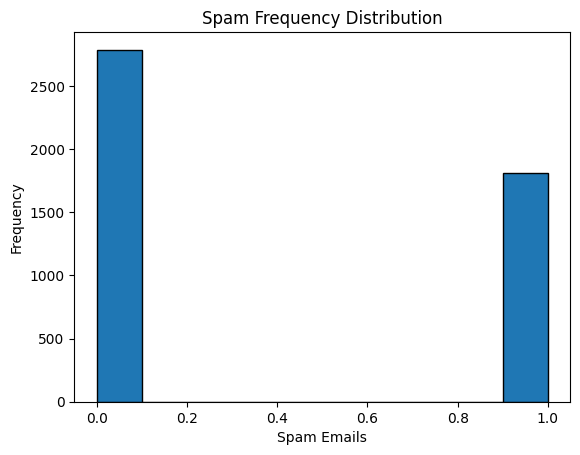

In [42]:
#Histogram of the Spam
plt.hist(spam_df["spam"], edgecolor='black')
plt.xlabel("Spam Emails")
plt.ylabel("Frequency")
plt.title("Spam Frequency Distribution")

Text(0.5, 1.0, 'Histogram of the Frequency of the Word Your')

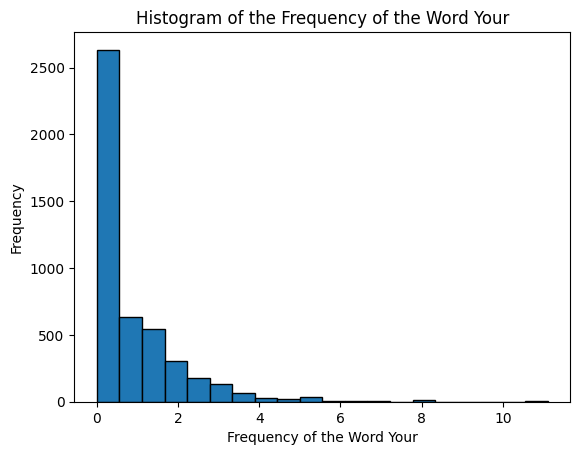

In [43]:
#Histogram of the Frequency of the Word Your
plt.hist(spam_df["word_freq_your:"], bins=20, edgecolor='black')
plt.xlabel("Frequency of the Word Your")
plt.ylabel("Frequency")
plt.title("Histogram of the Frequency of the Word Your")

Text(0.5, 1.0, 'Histogram of the Frequency of the Word Money')

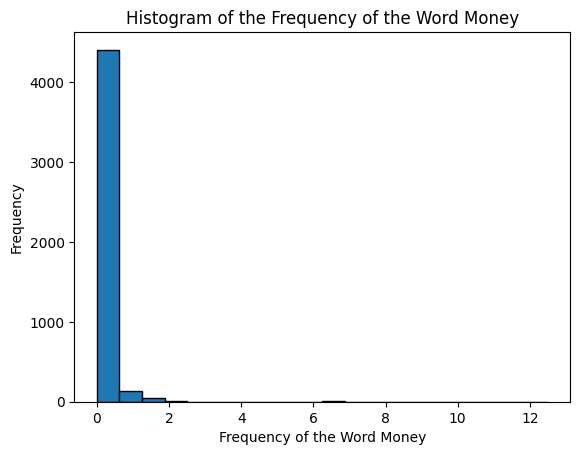

In [44]:
#Histogram of the Frequency of the Word Money
plt.hist(spam_df["word_freq_money:"], bins=20, edgecolor='black')
plt.xlabel("Frequency of the Word Money")
plt.ylabel("Frequency")
plt.title("Histogram of the Frequency of the Word Money")

Text(0.5, 1.0, 'Histogram of the Frequency of the Word Credit')

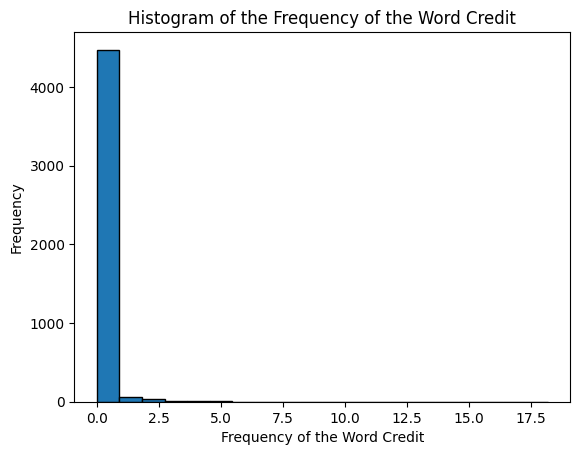

In [45]:
#Histogram of the Frequency of the Word Credit
plt.hist(spam_df["word_freq_credit:"], bins=20, edgecolor='black')
plt.xlabel("Frequency of the Word Credit")
plt.ylabel("Frequency")
plt.title("Histogram of the Frequency of the Word Credit")

# Question 4

Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

### Answer

Below, I still out the following models that could be used to evaluate data with a continous dependent variable:

1. Logistic Regression
2. Penalized Logistic Regression
3. SVM
4. k-Nearest Neighbor Classifer
5. Decision Tree Classifier
6. Random Forest Classifier
7. Bagging Classifier

---

# Question 5

Describe the importance of training and test data.  Why do we separate data into these subsets?

### Answer

The goal of supervised machine learning, where we have input and output data, is to create models that can generalize to unseen data. However, if we used our entire dataset to analyze the quality of our models, we would not know how well it can predict new data. As a result, we split the data so that we can see how well the model can predict to new data.

----

# Question 6

What is k-fold cross validation and what do we use it for?

### Answer

In k-fold cross-validation, we split our training dataset into k folds (subsets) and selects one fold as our "test", also called validation, data and the $k-1$ as our training data. After, cross validation trains the $k-1$ folds of data and then tests it on the one fold designated as test data. However, this is an iterative process: cross-validation will select a different fold and use that as test data, while the other $k-1$ folds are used to training the algorithm. This is process is done $k$ times. In short, each fold will be used as validation data only oce, and training data $k-1$ times.

Cross validation is highly important because it allows us to see how the model will perform with different splits of the training data. In short, by having different combinations of the training and validation data, we can see how well on average the model can generalize to new data, and decrease the chance that we overfit. Additionally, we can compare mean cross-validation scores against other models, allowing us to decide which model we believe will be the best at predicitng new data.

---

# Question 7

 How is k-fold cross validation different from stratified k-fold cross validation?

### Answer

 In k-fold cross validation, we are splitting the data into k subsets without frequencies of each class in each fold. For example, suppose that we have 100 observations where are target feature has an equal amount of the five following classes: $1$, $2$, $3$, $4$, and $5$. This means that 20% of the data has one class. Furthermore, suppose that the data is ordered by class, so the first 20 observations is $1$, the second 20 are $2$, and so on. As a result, if we did 5 k-fold cross-validation, each fold will have the same class, which is not reflective of the entire sample. This will cause the cross-validation score to be zero. Stratified k-fold cross-validation ensures that each fold has the same proprtion of classes or values of the target feature as the overall sample. In this case, each fold will have 20% of each class, allowing for the training folds to better generalize to the validation fold.

---

# Question 8

Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

## KNN

### Preprocessing and Finding optimal parameter

In [46]:
#Creating y and X variables
X = spam_df[['word_freq_your:', 'word_freq_money:', 'word_freq_credit:']]
y = spam_df['spam']


In [47]:
from sklearn.model_selection import train_test_split

#Splitting X and y into testing and training with default split (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)


In [48]:
from sklearn.preprocessing import StandardScaler

#Scaling X training and testing data using the StandardScaler function
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold


kfold = KFold(n_splits=10) #K-fold object with 10 splits
knn = KNeighborsClassifier()

hyperparameters = {'n_neighbors': np.arange(1, 23, 2) }

grid_knn = GridSearchCV(knn, param_grid=hyperparameters, cv=kfold)
grid_knn.fit(X_train_scaled, y_train)

knn_bestparam = grid_knn.best_params_
print("The best parameters for KNN:", knn_bestparam)



The best parameters for KNN: {'n_neighbors': 17}


### Analysis of Parameter(s)

To find the optimal parameter, I use Python's GridSearchCV function. I set the range for the hyperparameters parameters to be every odd number between 1 and 23. I set the maximum value to 23 since this dataset has 4600 observations. Since $17$ is the optimal number of k-neighbors, I will use this value for evaulating the test and cross-validation scores. Additionally, I set the number of splits in k-fold to 10 as that is the standard number of splits used by data scientists. Additionally, I scaled the X training and test data with the Standard Scaler, giving the values the a mean of 0 and variance of 1. This will prevent a value with a large distance from causing bias in the model.

### Part A: Evaulating Prediction Error on Test Data

In [50]:
'''
Finding the test score from the optimal parameter for KNN
'''

knn_testscore = round(grid_knn.score(X_test_scaled, y_test), 7)
print("Test score for KNN:", knn_testscore)

Test score for KNN: 0.7904452


### Part B:  Evaulating Prediction Error with CV

In [51]:
'''
Finding the cross-validation score from the optimal parameter for KNN
'''

knn_best_cv = round(grid_knn.best_score_,7)
print("Optimal mean cross-validation score for KNN:",  knn_best_cv)

Optimal mean cross-validation score for KNN: 0.7834239


----

# Question 9

Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?



## Penalized Logistic Regression

### Finding optimal parameter

In [52]:
'''
Penalized Logistic Regression
'''

from sklearn.linear_model import LogisticRegression

logreg =LogisticRegression(max_iter=1000000)
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['11', 'l2']}


grid_logreg = GridSearchCV(logreg, param_grid=hyperparameters, cv=kfold)
grid_logreg.fit(X_train_scaled, y_train)

logreg_bestparam = grid_logreg.best_params_
print("The best parameters for Logistic Regression:", logreg_bestparam)


The best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}


### Analysis of Parameter(s)

The next model I will use is a penalized logistic regression

To find the optimal parameter, I use Python's GridSearchCV function.

Since the general practice is to set the tuning parameters for penalized logistic regression on a logarithmic scale, I set the parameters as $0.001$, $0.01$, $0.1$, $1$, $10$, and $100$. Additionally, I included the penalty parameters. The optimal parameters are $C=10$ and the penalty is $l2$. As a resutlt, I will use these to evaulate the model.

Additionally, I use scaled data for the X training and test set using Python's StandardScaler function.



## Model Evaluation

### Part A

In [53]:
logreg_testscore = round(grid_logreg.score(X_test_scaled, y_test), 7)
print("Test score for Penalized Logistic Regression:", logreg_testscore)

Test score for Penalized Logistic Regression: 0.7502714


### Part B

In [54]:
logreg_best_cv = round(grid_logreg.best_score_ ,7)
print("Optimal mean cross-validation score for Penalized Logistic Regression:", logreg_best_cv)

Optimal mean cross-validation score for Penalized Logistic Regression: 0.7695652


### Analysis of Prediction Error

For penalized logistic regression, the prediction error was worse for both the test score and optimal mean cross-validation score. In KNN, the test score is $0.7904452$ and the optimal mean cross-validation score is $0.7834239$. For penalized logistic regression, the test score is $0.7502714$ and the optimal mean cross-validation score is $0.7695652$.

Since the optimal cross-validation score for the Penalized Logistic Regression model is worse than the KNN model, this model does not predict the data better.


---

# Question 10

Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?



## SVM

### Finding optimal parameter and preprocessing

In [55]:
'''
SVM
'''

from sklearn.svm import SVC
svm = SVC()


In [56]:
#Scaling X training and testing data using the MinMax function


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Instead of using the StandardScaler, I use the MinMaxScaler for SVM, which makes the values fall between 0 or 1. Since the goal of SVM is create a hyperplane with the maximum distance between classes (in this case Spam and not Spam), I used the MinMaxScaler to make the data on the same scale to prevent any possible bias from outlier observations. Like KNN, SVM is can also have bias if the data is not scaled.



In [57]:
'''
IMPORANT: Please allow 30 to 60 seconds to run
'''

hyperparameters = {'C': [0.1, 1,10], 'gamma': [0.1, 1,10]}

grid_svm = GridSearchCV(svm, param_grid=hyperparameters, cv=kfold)
grid_svm.fit(X_train_scaled, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [58]:
svm_bestparam = grid_svm.best_params_
print("The best parameters for SVM:", svm_bestparam)


The best parameters for SVM: {'C': 10, 'gamma': 10}


### Analysis of Parameter(s)

For both regularization parameter $C$ and the width of the Guassian kernal parameter $\gamma$, I use the same values as done in  the Penalized Logistic Regression model: [ $0.01$, $0.1$, $1$, $10$, $100$]. However, I omit $0.01$ and $100$ due to the very long run time. After tuning the SVM model using gridsearch CV, the optimal parameters when $C=10$ and $\gamma=10$. As a result, I will use these to evaulate the model.

## Model Evaluation

### Part A

In [59]:
svm_testscore = round(grid_svm.score(X_test_scaled, y_test), 7)
print("Test score for SVM:", svm_testscore)

Test score for SVM: 0.7763301


### Part B

In [60]:
svm_best_cv = round(grid_svm.best_score_ ,7)
print("Optimal mean cross-validation score for SVM:", svm_best_cv)

Optimal mean cross-validation score for SVM: 0.7790761


### Analysis:

The test score for SVM is $0.7763301$ and the optimal mean cross-validation score is $0.7790761$. Although these scores are better than the scores for the Penalized Logistic Regression model, the best model so far for evaluating this data is KNN, as it has the highest optimal mean cross-validation ($0.7834239$).

List of optimal mean cross-validation scores through Question 10:

1. KNN $= 0.7834239$

2. Penalized Logistic Regression $= 0.7695652$

3. SVM $= 0.7790761$

----

# Question 11

Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Evaluate prediction error, did this model predict better than your previous models?



## Decision Tree Classifier

### Finding optimal parameter

In [61]:
'''
Decision Tree Model
'''

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [62]:
hyperparameters = {'max_depth': np.arange(1,9)}

grid_tree = GridSearchCV(decision_tree, param_grid=hyperparameters, cv=kfold)
grid_tree.fit(X_train_scaled, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [63]:
tree_bestparam = grid_tree.best_params_
print("The best parameters for Decision Tree Classifier:", tree_bestparam)


The best parameters for Decision Tree Classifier: {'max_depth': 5}


### Analysis of Parameters

The last model I am using is the Decision Tree Classifer. Unlike the previous models, I will not scale the data since this does not involve classifying based off distances, like KNN or SVM.

The only parameter I decided to tune in the decision tree is the max depth. I set the parameters to be 1 through 9.

The gini coefficent and entropy scores tend to be the same; as a result, it did not make sense to tune the criterion. Additionally, min_leaf_samples is a hard parameter to tune because it is difficult to find a minumum number of observations at each internal node. As a result, I set it to its default.

The best max_depth parameter is 5. As a resutlt, I will use this parameter to evaulate the model.

### Part A

In [64]:
tree_testscore = round(grid_tree.score(X_test_scaled, y_test), 7)
print("Test score for Decision Tree Classification:", tree_testscore)

Test score for Decision Tree Classification: 0.7795874


### Part B

In [65]:
tree_best_cv = round(grid_tree.best_score_ ,7)
print("Optimal mean cross-validation score for Decision Tree Classification:", tree_best_cv)

Optimal mean cross-validation score for Decision Tree Classification: 0.7861413


### Analysis:

The Decision Tree Classifier has the highest optimal mean cross-validation score amongst all models tested. As a result, it is the best model to evaluate new data.

List of optimal mean cross-validation scores through Question 11:

1. KNN $= 0.7834239$

2. Penalized Logistic Regression $= 0.7695652$

3. SVM $= 0.7790761$

4. Decision Tree Classifier $=0.7861413$

----

## Question 12

Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  



The additional variables I believe will increase the prediction accuracy are are listed below:

1. word_freq_receive:

2. word_freq_business:

3. word_freq_order:



In [66]:
#Creating y and X variables
X = spam_df[['word_freq_your:', 'word_freq_money:', 'word_freq_credit:',
             'word_freq_receive:', 'word_freq_business:', 'word_freq_order:']]
y = spam_df['spam']


In [67]:
#Splitting X and y into testing and training with default split (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)



## Decision Tree Model

The best model (the one with the highest optimal cross-validation score) was the Decision Tree Classifer model with a max_depth of 5.

### Using the same parameters as Question 11

I will evaluate the mean cross-validation score of the model with the three new features, using the same parameters from Question 11 (max_depth $=5$).

In [68]:
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

decision_tree.fit(X_train, y_train)
decision_tree_mean_score = cross_val_score(decision_tree, X_train, y_train, cv=kfold).mean()

print("Test score for Decision Tree Classifier: ", round(decision_tree.score(X_test, y_test), 7))
print("Mean cross-validation score for Decision Tree Classifier: ", round(decision_tree_mean_score, 7))


Test score for Decision Tree Classifier:  0.7774159
Mean cross-validation score for Decision Tree Classifier:  0.8103261


### Analysis:

The mean cross-validation score using the same parameters as the Decision Tree Classifier used in Question 11 (max_depth $=5$) was higher than when three variables were added. The mean cross-validation scores are listed below for reference:

1. Decision Tree Classifier with only the original three features (from Question 11): $0.7861413$
2. Decision Tree Classifier with the six features: $0.8103261$


I will also tune the new Decision Tree Classifier model to find the optimal parameters for max_depth using GridSearchCV. This will allow me to make a final decision on which model I would use to evaluate the data. I will use the same hyperparameters from Question 11.

In [69]:
decision_tree = DecisionTreeClassifier(random_state=42)

hyperparameters = {'max_depth': np.arange(1,9)}

grid_tree = GridSearchCV(decision_tree, param_grid=hyperparameters, cv=kfold)
grid_tree.fit(X_train, y_train)

print("The best parameters for DecisionTree Classifier:", grid_tree.best_params_)
print("Test score for DecisionTree Classifier:", round(grid_tree.score(X_test, y_test), 7))
print("Optimal mean cross-validation score for DecisionTree Classifier:", round(grid_tree.best_score_ ,7))

The best parameters for DecisionTree Classifier: {'max_depth': 8}
Test score for DecisionTree Classifier: 0.7904452
Optimal mean cross-validation score for DecisionTree Classifier: 0.8163043


### Decision Tree Classifier GridsearchCV Analysis:


After running a GridSearchCV model for the Decision Tree Classifer with all six variables, the optimal parameter is when the max depth is $8$. Additionally, the optimal mean cross-validation is $0.8163043$, which is higher than when had the max_depth was set to $5$.

----

# Question 13

Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  




### Method

Like my Decision Tree Classifier model, I am going to run models with the optimal parameters from the previous questions to evaluate whether or not the original model improved when more variables were added. After, I am going to tune the models to see find the optimal parameters with the new independent variables. This will allow me to make a proper decision on the final model I will choose.

## SVM

### Using the same parameters as Question 10

$C=10$ and $\gamma=10$

In [70]:
'''
Since the SVM gridsearchCV model in Question 9 was run with X scaled data, using MinMaxScaler, I
am going to scale the new X training data with the same function
'''

#Scaling X training and testing data using the StandardScaler function
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
svm = SVC(C=10, gamma=10)

svm.fit(X_train_scaled, y_train)
svm_mean_score = cross_val_score(svm, X_train_scaled, y_train, cv=kfold).mean()

print("Test score for SVM: ", round(svm.score(X_test_scaled, y_test), 7))
print("Mean cross-validation score: ", round(svm_mean_score, 7))


Test score for SVM:  0.7926167
Mean cross-validation score:  0.8127717


### Analysis:

The mean cross-validation score using the same parameters as the SVM used in Question 10 ($C=10$ and $\gamma=10$) was higher than when three variables were added. The mean cross-validation scores are listed below for reference:

1. SVM  with only the original three features (from Question 10): $0.7790761$
2. SVM with the six features: $0.8127717$




I will also tune the new SVM model to find the optimal parameters for $C$ and $\gamma$ using GridSearchCV. This will allow me to make a final decision on which model I would use to evaluate the data. I will use the same hyperparameters from Question 10.

In [72]:
'''
IMPORANT: Please allow 30 to 60 seconds to run
'''

svm = SVC()

hyperparameters = {'C': [0.1, 1,10], 'gamma': [0.1, 1,10]}

grid_svm = GridSearchCV(svm, param_grid=hyperparameters, cv=kfold)
grid_svm.fit(X_train_scaled, y_train)

print("The best parameters for SVM:", grid_svm.best_params_)
print("Test score for SVM:", round(grid_svm.score(X_test_scaled, y_test), 7))
print("Optimal mean cross-validation score for SVM:", round(grid_svm.best_score_ ,7))

The best parameters for SVM: {'C': 10, 'gamma': 10}
Test score for SVM: 0.7926167
Optimal mean cross-validation score for SVM: 0.8127717


### SVM GridsearchCV Analysis:

The optimal parameters for SVM are the same as those found in Question 10. However, the optimal mean cross-validation score increased when we added more variables.

---

## KNN

### Paramters from Question 8

n-neighbors $= 17$

In [73]:
'''
Since the KNN gridsearchCV model in Question 8 was run with X scaled data, using StandardScaler, I
am going to scale the new X training data with the same funciton
'''

#Scaling X training and testing data using the StandardScaler function
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train_scaled, y_train)
knn_mean_score = cross_val_score(knn, X_train_scaled, y_train, cv=kfold).mean()

print("Test score for KNN:", round(knn.score(X_test_scaled, y_test), 7))
print("Mean cross-validation score for KNN:", round(knn_mean_score, 7))


Test score for KNN: 0.8023887
Mean cross-validation score for KNN: 0.8048913


### Analysis

The mean cross-validation score using the same parameter as the KNN used in Question 10 (n_neighbors$=17$) was higher than when three variables were added. he mean cross-validation scores are listed below for reference:

1. KNN with the original three features (from Question 8): $0.7834239$
2. KNN with the six features: $0.8048913$

I will also tune the new KNN model to find the optimal parameter of the nearest neighbors using GridSearchCV. This will allow me to make a final decision on which model I would use to evaluate the data. I will use the same hyperparameters from Question 8.

In [75]:
knn = KNeighborsClassifier()

hyperparameters = {'n_neighbors': np.arange(1, 23, 2) }

grid_knn = GridSearchCV(knn, param_grid=hyperparameters, cv=kfold)
grid_knn.fit(X_train_scaled, y_train)

print("The best parameters for KNN:", grid_knn.best_params_)
print("Test score for KNN:", round(grid_knn.score(X_test_scaled, y_test), 7))
print("Optimal mean cross-validation score for KNN:", round(grid_knn.best_score_ ,7))

The best parameters for KNN: {'n_neighbors': 9}
Test score for KNN: 0.8099891
Optimal mean cross-validation score for KNN: 0.8179348


### KNN GridsearchCV Analysis:


After running a GridSearchCV model for the KNN with all six variables, the optimal parameter  is when n_neighbors $=9$. Additionally, the optimal mean cross-validation is $0.8179348$, which is higher than when we had n_neighbors set to $17$.

### Logistic Regression

### Parameters from Question 9

$C=10$ and Penalty=$L2$




In [76]:
logreg =LogisticRegression(C=10, penalty='l2', max_iter=1000000)

logreg.fit(X_train_scaled, y_train)
logreg_mean_score = cross_val_score(logreg, X_train_scaled, y_train, cv=kfold).mean()

print("The test score for Logistic Regression: ", round(logreg.score(X_test_scaled, y_test), 7))
print("The mean cross-validation score for Logistic Regression: ", round(logreg_mean_score, 7))


The test score for Logistic Regression:  0.7665581
The mean cross-validation score for Logistic Regression:  0.7915761


### Analysis

The mean cross-validation score using the same parameters as the Penalized Logistic Regression used in Question 9 ($C=10$ and penalty=$l2$) was higher than when the three original three variables were included. he mean cross-validation scores are listed below for reference:

1. Penalized Logistic Regression with the original three features (Optimized): $0.7695652$
2. Penalized Logistic Regression with the additional three features: $0.7915761$

### Logistic Regression Tuning

I will also tune the new Penalized Logistic Regression model to find the optimal parameter $C$ and penalty using GridSearchCV. This will allow me to make a final decision on which model I would use to evaluate the data. I will use the same hyperparameters from Question 9.

In [77]:
logreg =LogisticRegression(max_iter=1000000)
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['11', 'l2']}


grid_logreg = GridSearchCV(logreg, param_grid=hyperparameters, cv=kfold)
grid_logreg.fit(X_train_scaled, y_train)

print("The best parameters for Logistic Regression:", grid_logreg.best_params_)
print("Test score for Logistic Regression:", round(grid_logreg.score(X_test_scaled, y_test), 7))
print("Optimal mean cross-validation score for Logistic Regression:", round(grid_logreg.best_score_ ,7))

The best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Test score for Logistic Regression: 0.762215
Optimal mean cross-validation score for Logistic Regression: 0.7915761


The optimal parameter is when $C=1$ and the penalty is $L2$, giving a mean cross-validation score of $0.7915761$. Although this is the same as when $C=10$ and the penalty is $L2$, I will choose the simplier model ($C=1$). Note that this is only comparing across Penalized Logistic Regression models, not amongst all models.

----

### Summary of Results

Scores with three Original Variables (tuned):

1. KNN $= 0.7834239$

2. Penalized Logistic Regression $= 0.7695652$

3. SVM $= 0.7790761$

4. Decision Tree Classifier $=0.7861413$


Scores Scores with all six independent variables using the optimal parameters found in Questions 8 through 11:

1. KNN $= 0.8048913$

2. Penalized Logistic Regression $ = 0.7915761  $

3. SVM $ = 0.8127717 $

4. Decision Tree Classifier $= 0.8103261 $

Scores with all six independent variables after applyin GridSearchCV:

1. KNN $= 0.8179348$

2. Penalized Logistic Regression $=0.7915761$

3. SVM $= 0.8127717$

4. Decision Tree Classifier $= 0.8163043 $


## Final Model

The best model is the KNN with my six features, after scaling the X training and test data with StandardScaler, and 9 neighbors, which has a mean cross-validation score of $0.8179348$. As a result, I will choose this model. Additionally, it is worth noting that it makes sense that this model will have the best mean cross-validation score. Although the dataset has thousands of observations, it is relatively simple. There is no missing data, and the target feature is binary. Although Logistic Regression and SVM also have close scores, I will choose KNN based off the scoring metric.

---

## Question 14

What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

### Answer

One variable that is not in the model but would likely increase my final model's predictive power is the frequenchy of the word "hello." In my experience, a lot of my emails that go to spam, or emails I put in spam, often start with the word "hello." Normally, when someone is trying to solicate money or my information, they start the email with the word "Hello."

---

## Question 15

 Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.

### Answer

Below, I still out the following models that could be used to evaluate data with a continous dependent variable:

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. KNeighbors Regression
5. Decision Tree Regression
6. Random Forest Regression
7. Bagging Regression